Author Name: Uzma Ejaz 

Education: Master Of computer Science

Dataset: Diwali Sales Data [link](<Diwali Sales Data.csv>)

Complete project on GitHub: [link](https://github.com/uasamsh/Diwali-Sale-EDA/blob/main/Diwali_Sales_EDA.ipynb)


# import python libraries

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [48]:
# import csv file
d_sales = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

# Check the First 5 `rows`

In [49]:
d_sales.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Check The `rows` and `columns`

In [50]:
d_sales.shape

(11251, 15)

# Information about data

In [51]:
d_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Check the null values 

In [52]:
d_sales.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

# `Remove` the Columns which have `null values`
## `Drop` unrelated columns which have null/blank values

In [53]:

d_sales.drop(['Status', 'unnamed1'], axis=1, inplace=True)

# Now `check` the null values and Drop columns

In [54]:

d_sales.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

# Now drop the null values 

In [55]:
# drop null values
d_sales.dropna(inplace=True)

# Now `check` the null values

In [56]:
d_sales.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# Now `check` the `data type`

In [57]:
d_sales.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

# Now `change` the `data type` in `Amount Column`

In [58]:

d_sales['Amount'] = d_sales['Amount'].astype('int')

# `Check`  the `data type` in `Amount Column`

In [59]:
d_sales['Amount'].dtypes

dtype('int32')

# Check the `columns names`

In [60]:
d_sales.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#  Rename column` Marital_Status`

In [61]:
#rename column
d_sales.rename(columns= {'Marital_Status':'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


# Age column Count

In [62]:


count = d_sales['Age'].value_counts()
count


Age
30    522
26    494
28    460
29    454
31    448
     ... 
80      8
92      7
70      7
59      7
62      5
Name: count, Length: 81, dtype: int64

# Data summary  with `describe () ` method  in dataframe

In [63]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
d_sales.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


#  Now Check  Average for specific columns using describe() function

In [64]:
d_sales[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# ` EDA /Exploratory Data Analysis`
### Data Visualization` EDA With plots`

<Axes: xlabel='Product_ID', ylabel='Count'>

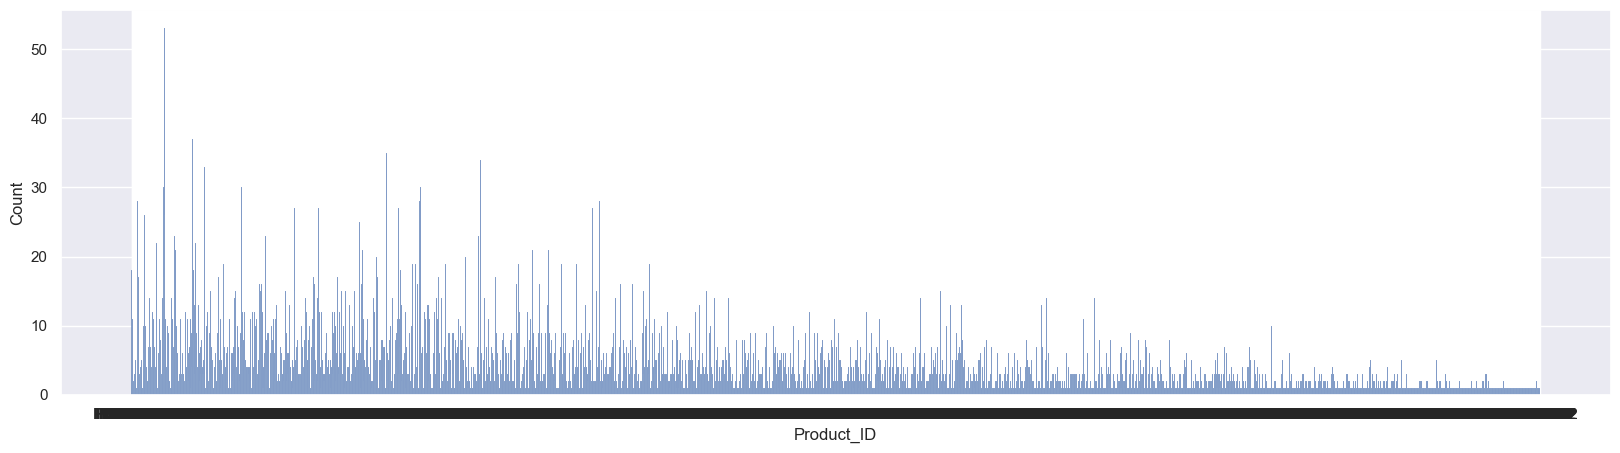

In [122]:
sns.set(rc={'figure.figsize':(20,5)})
d =sns.histplot(data=d_sales, x='Product_ID',bins=30)
d

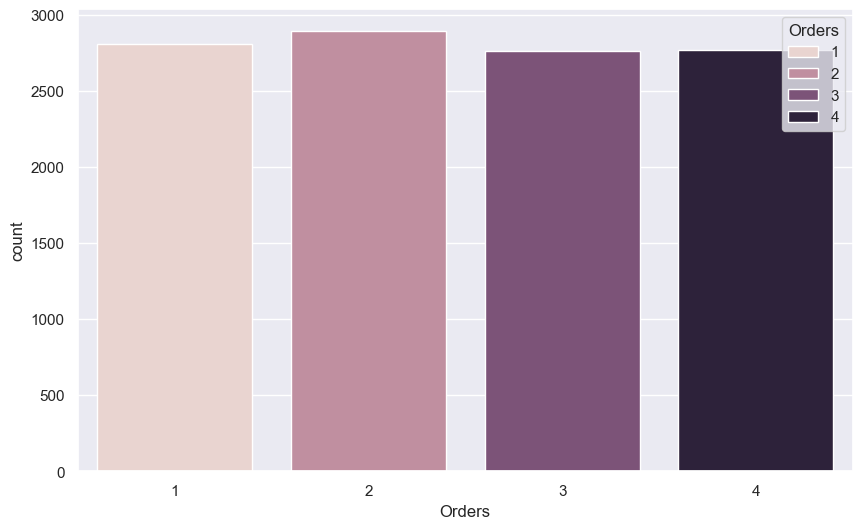

In [135]:

plt.figure(figsize=(10,6))
sns.countplot(x = 'Orders',hue='Orders',data = d_sales)
plt.show()


### In above plot maximum orders are` arround 28000`

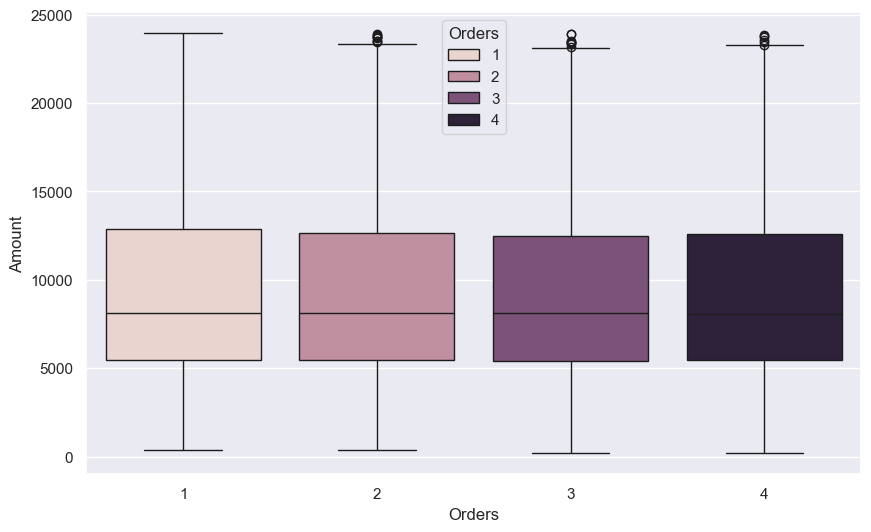

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Orders', y='Amount', hue= 'Orders',data = d_sales)
plt.show()

# We check Age and counts male and female 

<Axes: xlabel='Age', ylabel='count'>

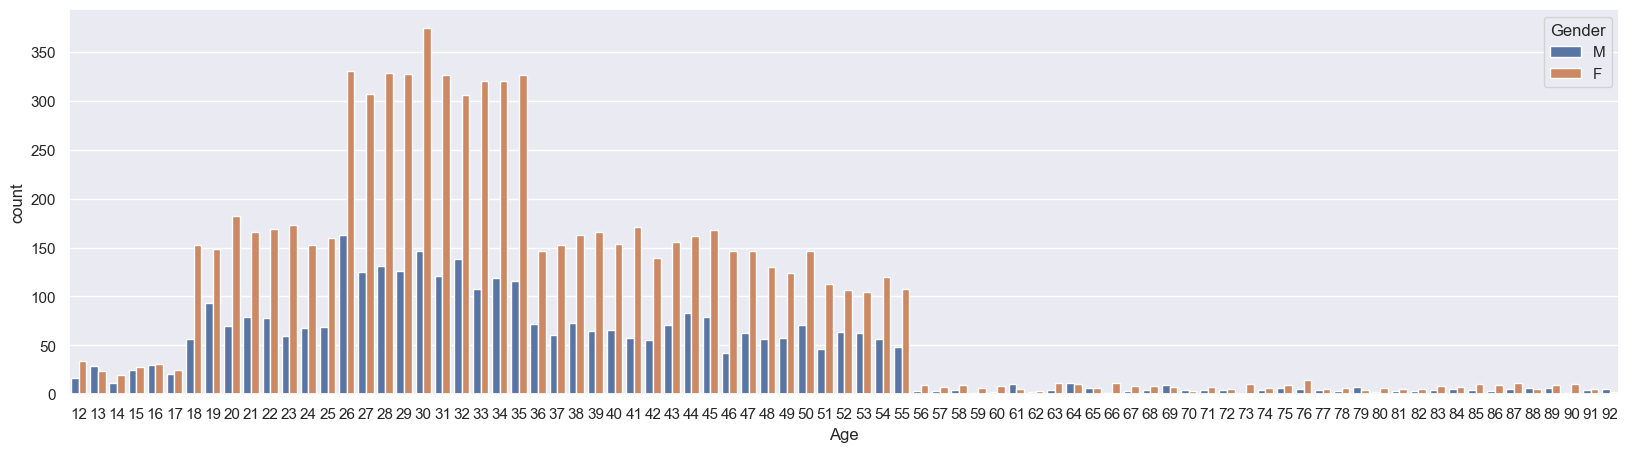

In [67]:
import seaborn as sns
sns.countplot(data = d_sales, x = 'Age', hue = 'Gender')



### We can see in above graph, Females of 30 years of age, who are more than 350 in number, are more ordrs than men

# Now check Age Group 

<Axes: xlabel='Age Group', ylabel='count'>

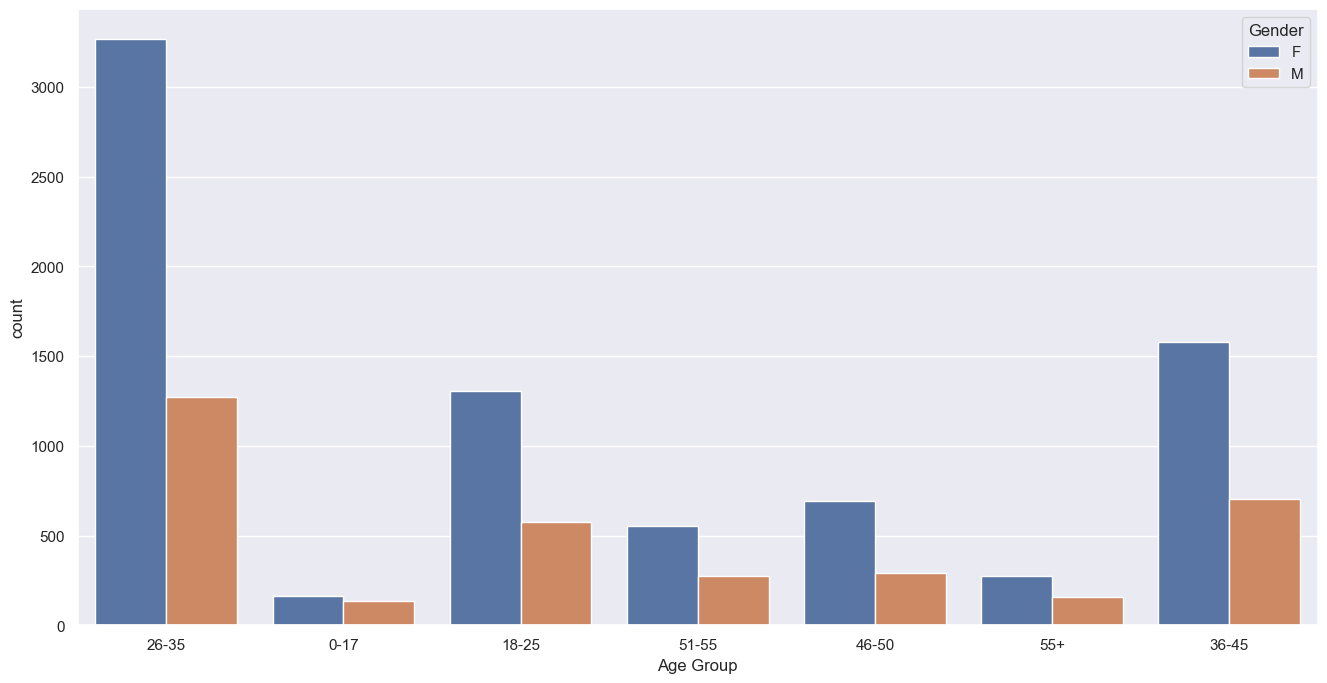

In [68]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.countplot(data = d_sales, x = 'Age Group', hue = 'Gender')

### In above plots we can see the buyers that are females of age in between 26 to 35 years old

### State

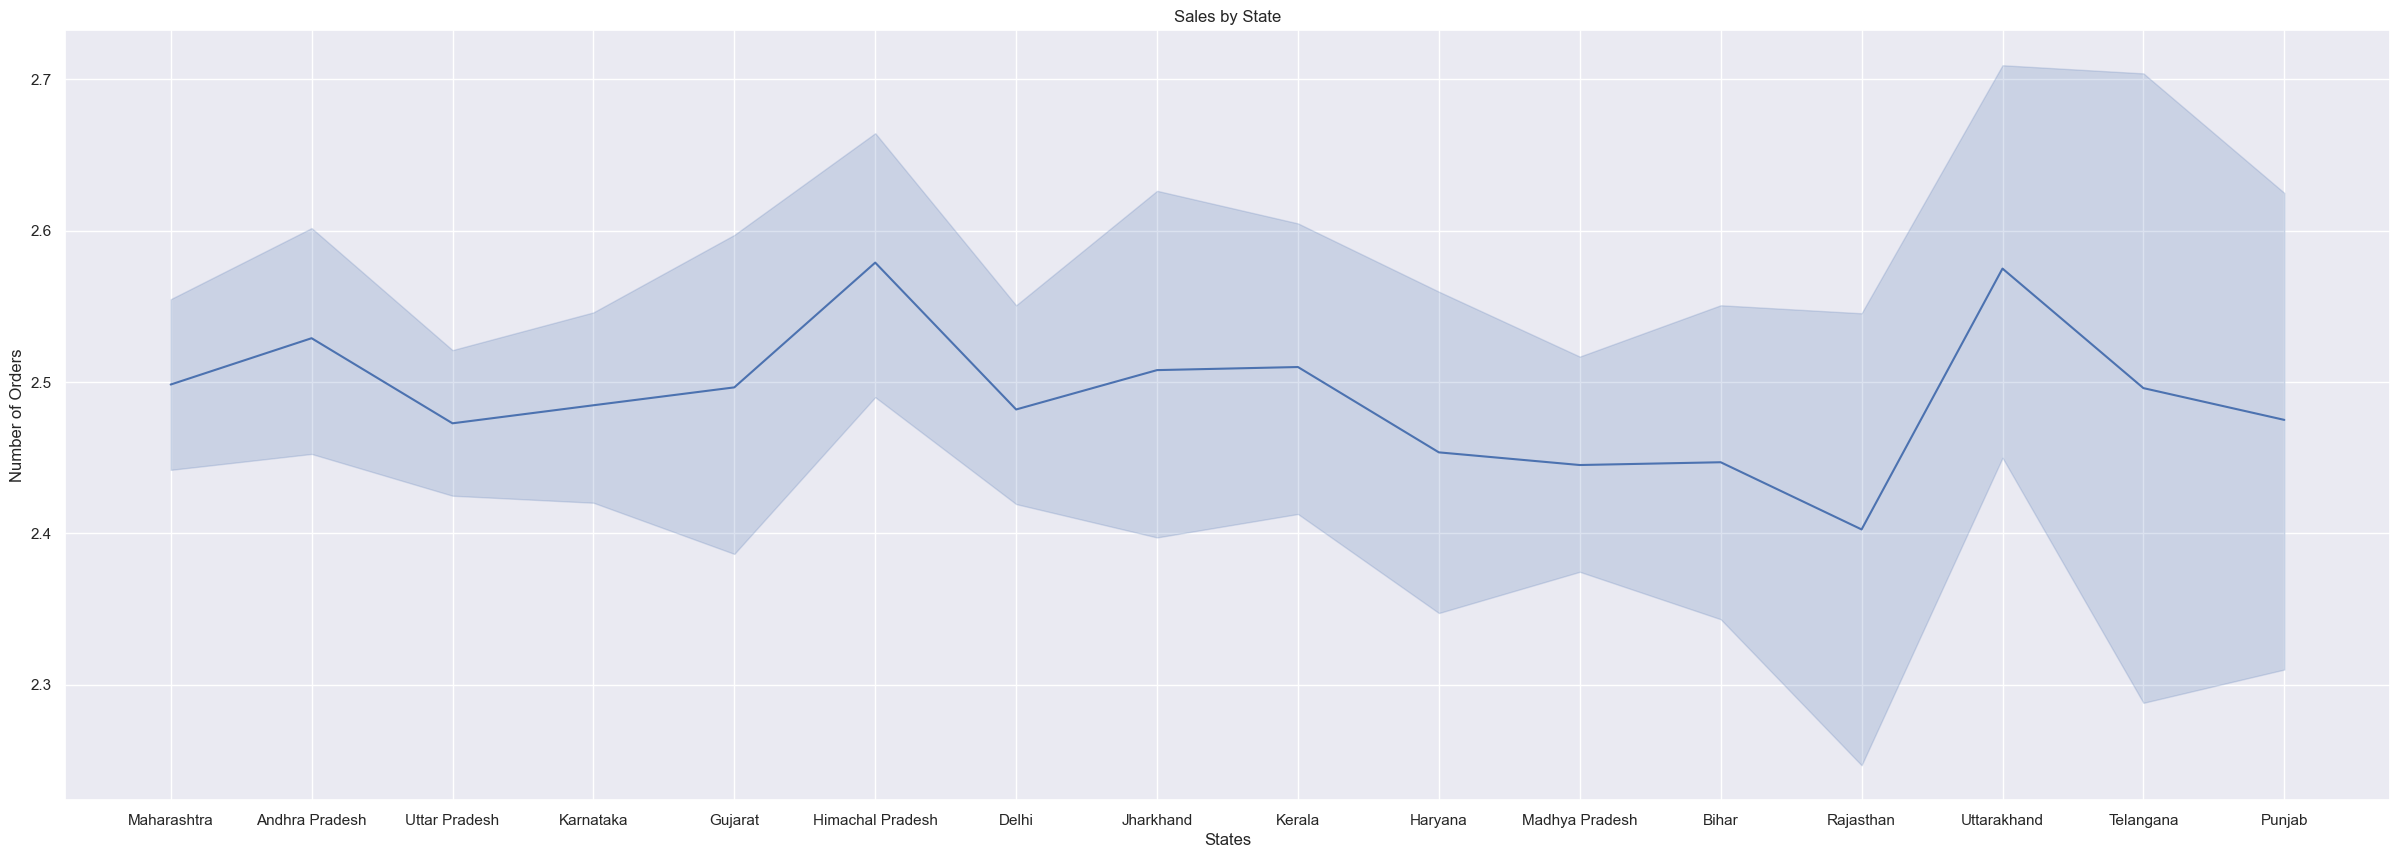

In [134]:
plt.figure(figsize=(30,10))
sns.lineplot(data=d_sales, x="State", y="Orders")
plt.title("Sales by State")
plt.xlabel('States')
plt.ylabel('Number of Orders')
plt.show()


### we can see in above graph that most of the sales by States


### Marital Status

<Axes: xlabel='Marital_Status', ylabel='count'>

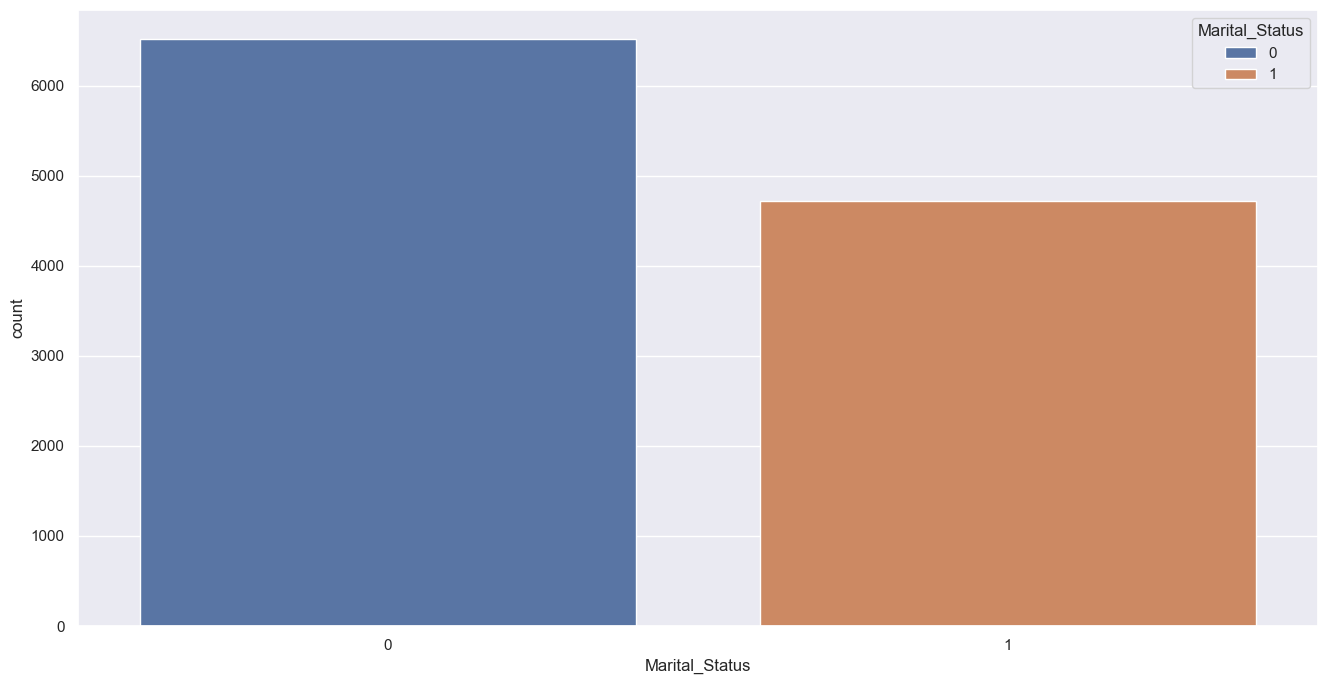

In [69]:
plt.figure(figsize=(16,8))
sns.countplot(data = d_sales, x = 'Marital_Status', hue='Marital_Status' )

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

# Now check  Occupations

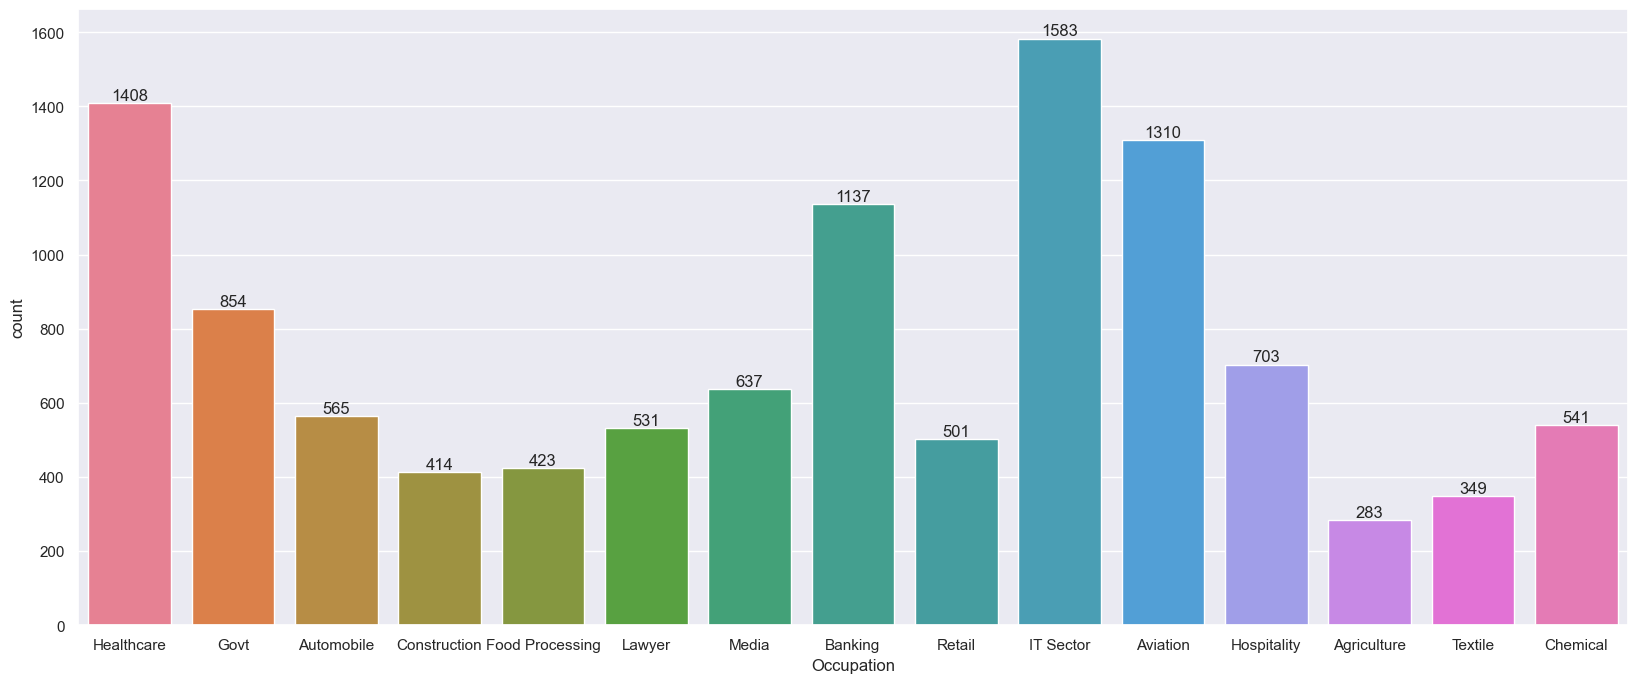

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
Occup = sns.countplot(data = d_sales, x = 'Occupation', hue='Occupation')

for bars in ax.containers:
    Occup.bar_label(bars)

#### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector and Banking Occupation

In [89]:
d_sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


<Axes: xlabel='Zone', ylabel='Orders'>

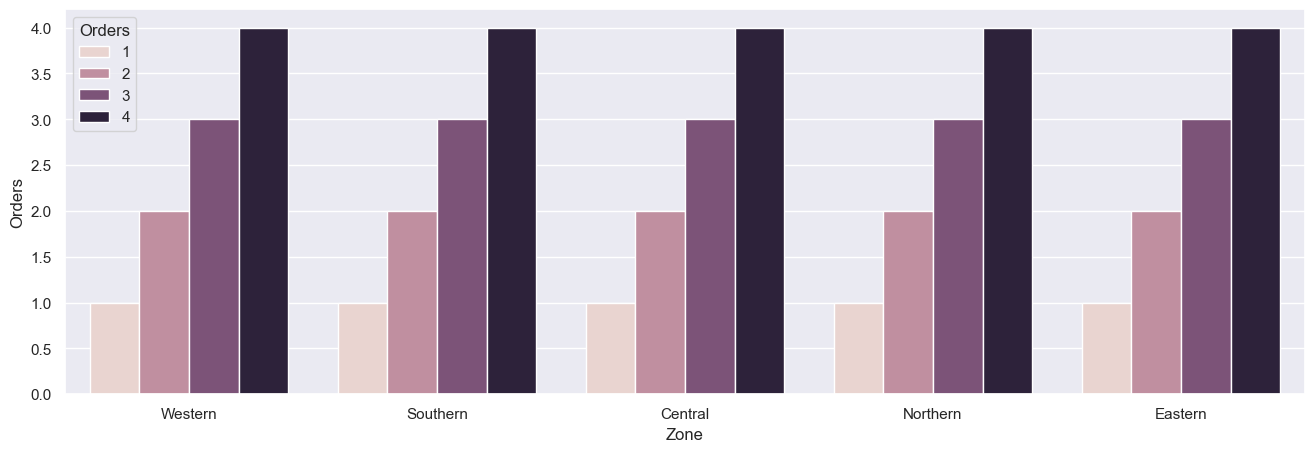

In [121]:
sns.set(rc={'figure.figsize':(16,5)})
scat= sns.barplot(data = d_sales, x = 'Zone', y='Orders',hue='Orders')
scat

# Now sale on Product Category

<Axes: xlabel='Product_Category', ylabel='count'>

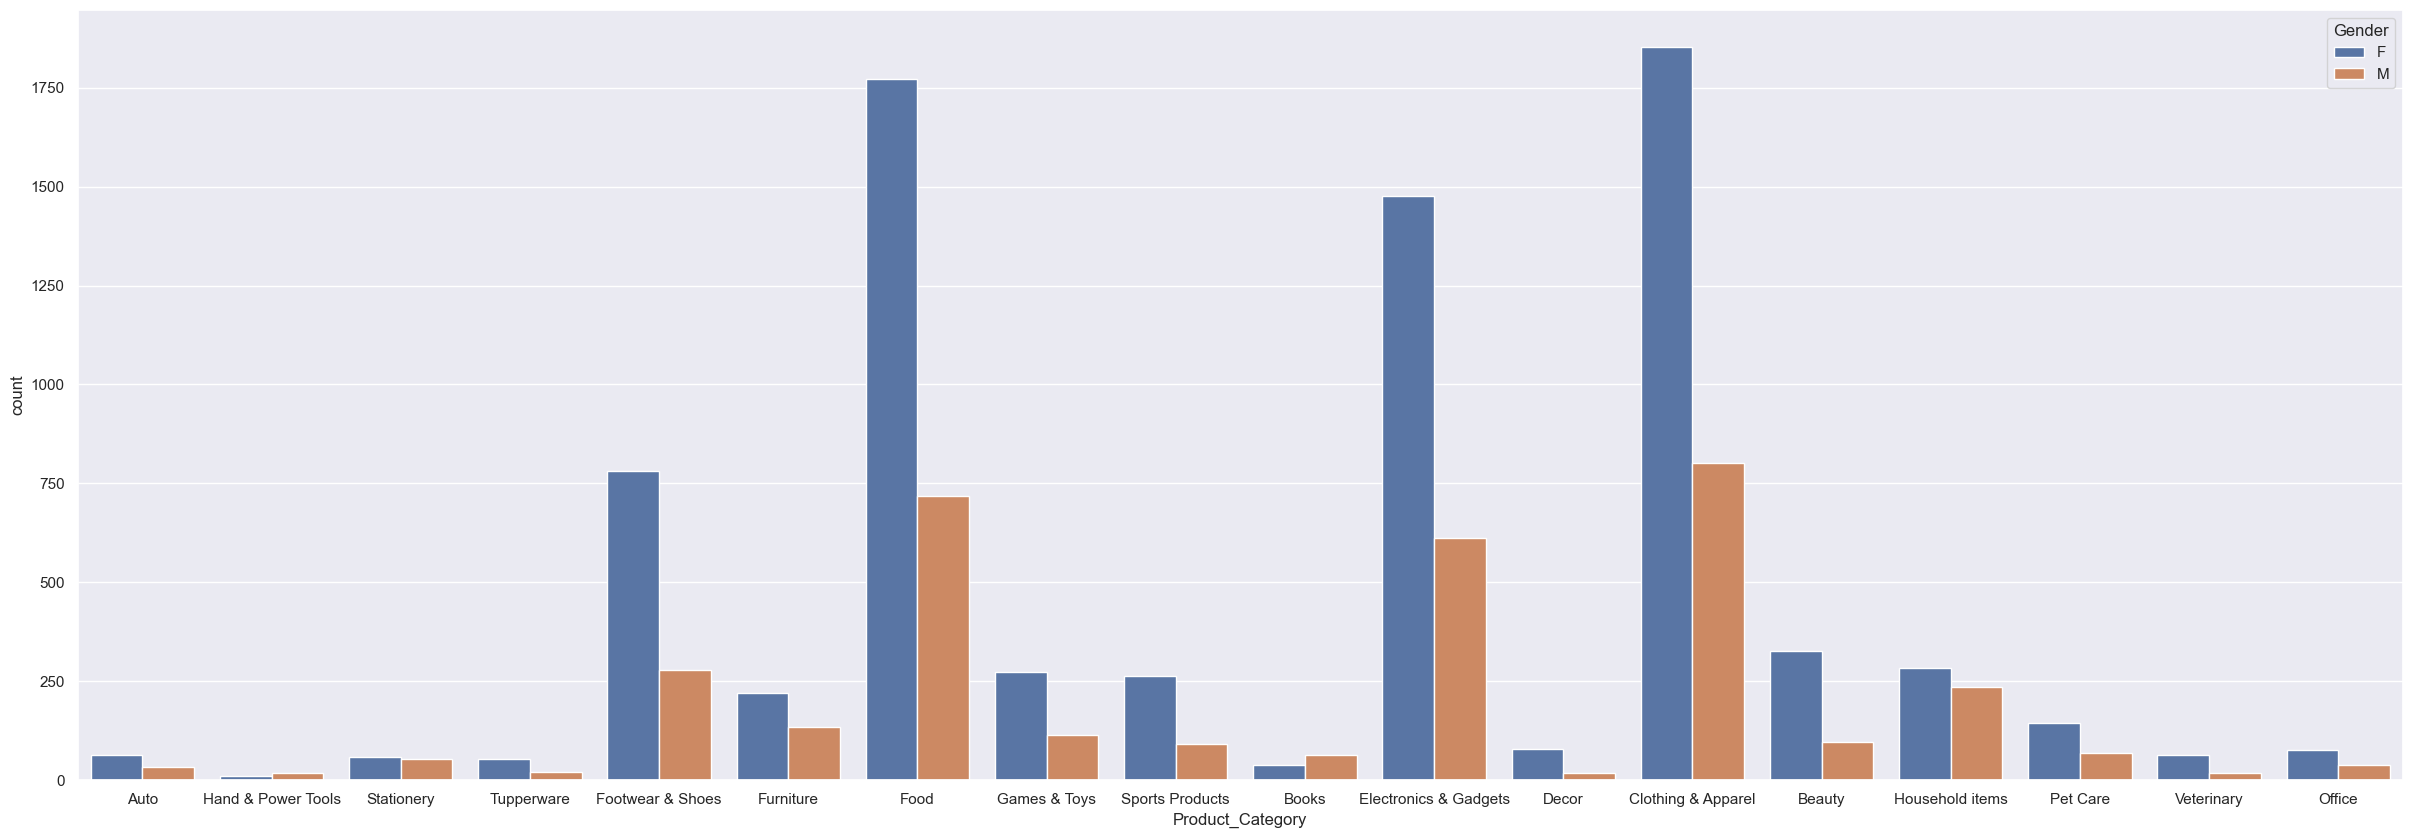

In [133]:
sns.set(rc={'figure.figsize':(30,10)})
Diwali_sales = sns.countplot(data = d_sales, x = 'Product_Category', hue="Gender")
Diwali_sales

####  we can see that most of the order from females  products are Food, Clothing and Electronics in above chart.

<Axes: xlabel='Product_Category'>

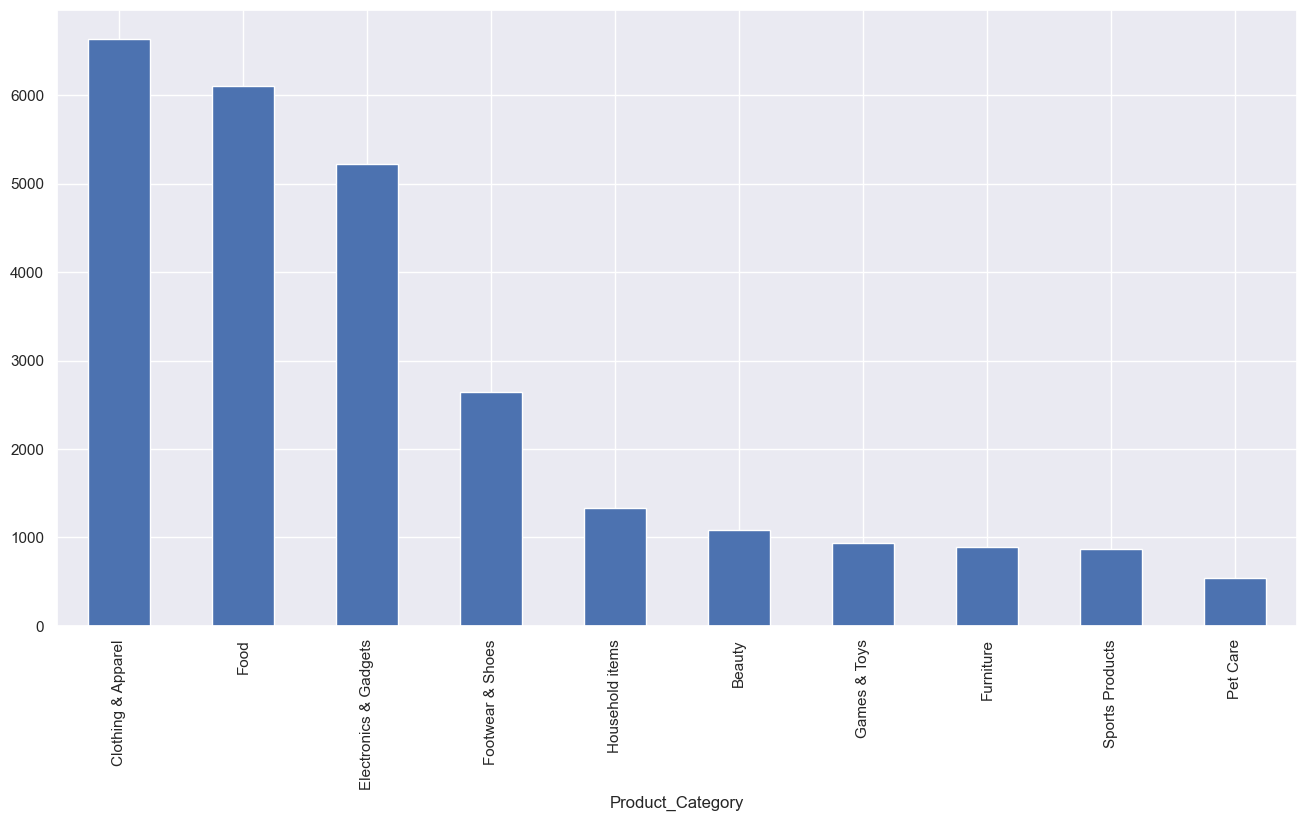

In [120]:
fig1, ax1 = plt.subplots(figsize=(16,8))
d_sales.groupby('Product_Category')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## We can see in above chart sold out most of the products are `'Clothing Apparel'`,`' Food '` , `'Electronics & Gadgets'`, `'Footwear & Shoes'`.

# OBSERVATION & CONCLUSIONS:

>- I observe in this dataset,Data Visualization` EDA With plots` 30 years old  married women(females) more orders than men.
>- Sold out most of the products are `'Clothing Apparel'`,`' Food '` , `'Electronics & Gadgets'`, `'Footwear & Shoes'`.
>- The number of orders is not equal between the two genders.
>- There are some missing values in datadet.
>- `Drop` unrelated columns which have null/blank values.
>- Rename column` Marital_Status` to Married.
>- `Change` the `data type` float to integer in `Amount Column`.


# Bundle of Thanks!
